# COGS 108 - Final Project change name of project

# Overview 

This project is aimed at exploring the relationships and correlation, between the type of  restaurant, chain or independent, to their health inspection ratings using datasets focused on North Carolina's state capital, Raleigh. Along with that, I wanted to find out if the number of critical or non-critical violations had an effect on the Score. These possible relationships and the creation of visualizations were then used to conclude that chain restaurants in Raleigh did receive high inspection scores on average than independent restaurants, but no correlation was found between the number of critical and non-critical violations to the scores.

# Name & PID

- Name: Tonia Le
- GitHub Username: toniale

# Research Question

- Do chain restaurants in Raleigh, NC receive higher health inspection scores on average than independent restaurants? How does the number of critical and non-critical violations affect these scores?

## Background and Prior Work

In the food industry, there are local independent and chain restaurants. An independent restaurant in defined as one that functions on a relatively small scale, which means the owners manage one or maybe two stores. Chain restaurants on the other hand are corporate restaurant chains and franchises with a board of owners and can be found throughout a region or nation.[3] All businesses that serve food are subjected to regular health inspections to ensure the health and safety of their guests.During the health inspection, inspectors typically check a number of things including: food contamination, hygiene, and general cleanliess. These inspections occur at random, but could every 6 months. However, if a complaint is filed against a business, inspectors are obligated to come take a look.[4] After every visit, a report is filed which includes information such as if the violations were critical or not. Critical violations often pose a high risk to food safety, where as non-critical do not.[5]


### Prior Work
Prior work pertaining to health inspections and the type of restaurant(chain or independent) have found connection between the two factors using descriptive statistics and other data analyzing techniques. It was found that both chain and independent restaurants in Lousianna often found themselves with health violations, but non-chain restaurants had more frequent critical violations.[1] Another study conducted by researchers in Pennsylviania exploring how restaurant inspection requency and the surrounding area's sociodemographic characteristics related to the health ratings received by chain and non-chain restaurants. The researchers used "nested mixed-effects regression analyses" and found that chain restaurants had less total violations per inspetion compared to nonchain restaurants.[2]

References (include links):

- 1) This study conducted by Pei Liu and Yee Ming Lee, investigated food safety performance between ethnic and nonethnic and chain and nonchain restarants in Louisiana. They used descriptive statistics, t-test, and Pearson Chi-square analyses in their study. They concluded that the frequency of violations found by independently operated resturants is an indicator that they should comply with FDA Food Code more diligently. https://www.tandfonline.com/doi/pdf/10.1080/15378020.2016.1206770?casa_token=CT2p-9nupKYAAAAA:jnQSYKYnpMMMihqgMQrA1Fwrhb3xpSD4AK3IoZ4jt2Jz1LZF9BydrfW0U-bmkNYq57ibefgRYly-GA

- 2) In this study by Sarah E. Leinwand, Karen Glanz, Brendan T. Keenan,and Charles C. Branas, the resesarchers sought out to explore how restaurant inspection frequency and the surrounding area's sociodemographic characteristics related to the ratings received by chain and non chain restaurants in Philadelphia, Pennsylvania between the years of 2013 and 2014. At the end of their study, they found that chain restuarants had less total violations per inspection compared to nonchain restaurants. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/

- 3) http://www.nevobusiness.com/independentrestaurants/ - Clarification on independent versus chain restaurants
- 4) https://blog.typsy.com/how-do-health-inspections-work - How Do Health Inspections Work?
- 5) https://www.statefoodsafety.com/Resources/Cartoons/january-cartoon-how-to-ace-your-health-inspections - How to Ace Your Health Inspections


# Hypothesis


The difference between chain and nonchain restaurants, is that chain restarants are to uphold the name of the franchise and maintain a certain level of quality ontop of the regulatory requirements by the U.S Food and Drug Administration. Because of this additional piece of accountability, I think chain restaurants in Raleigh tend to receive higher health inspection ratings on average than independent restaurants. In regards to the effect of the type of violation on an inspection rating, I think there would be a correlation between the number of critical violations and inspection scores, because I assume that more critical violations would weigh a restaurant's overall score down.

# Dataset(s) 

All of the following datatsets were provided by Professor Ellis on our COGS 108 course page. 

**Dataset 1: Restaurants** (restaurants.csv)

Number of observations: 3324 rows, 14 columns

The restaurants csv contains information of food busineses in North Carolina including their names and location(s).

Variables that I will use: 
        - hsisid
        - city
        - facility_type

 
**Dataset 2: Inspections** (inspections.csv)

Number of observations: 18466 rows, 36 columns

The inspections csv contains information regarding a business' visit from health inspectors, which includes: date of inspection, numbers of critical, and non-critical violations, etc. 

Variables that I will use: 
        - hsisid
        - name
        - city
        - score
        - facility_type
        - num_critical
        - num_non_critical

The restaurants dataset will be used to retrieve observations of facilities listed as restaurants in Raleigh, NC. After wrangling the dataset, I will combine it with a *tidied* dataset of inspections to collect data on the health inspection scores and number of critical and non-critical violations. 

# Setup

In [1]:
# Basic Necessities
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import warnings
from scipy import stats
import patsy


In [2]:
#Import DataFrames
restaurants = pd.read_csv('restaurants.csv')
inspections = pd.read_csv('inspections.csv')
zip_codes = pd.read_csv('zipcodes.csv')
violations = pd.read_csv('violations.csv')

# Data Cleaning

The csv datasets are not in tidy format, so to achieve a tidy dataset I will do the following for each:
   - Rename the columns, because some of the column names are two words, which would look nicer separated by an underscore, as well as capitalizing the column name would make reading the dataset easier.
   - Remove columns that are not related or relevant to our analysis and those thay may violate _**ethics and privacy**_
   - Making sure the format of my data is consistent (lowercase, uppercase, etc.)
   - After wrangling the individual datasets: restaurant and inspections into, we can merge them! 
 

# Part 1: Restaurant Dataset

In the raw dataset,we have a number of variables. I am aiming to explore the relationship between the type of restaurant and health inspection ratings. 

However, there are many columns that are not related to our topic and may violate ethics and privacy, such as the specifics on location, so we will remove a few of the columns.

We will be removing:
    - phone_number
    - x (longitude)
    - y (latitude)
    - geocode_status
    - address1
    - address2 
    - state
    - postalcode

First, I will check to see if this is actually a dataset based on pure North Carolina businesses.

In [3]:
restaurants['state'].unique()

array(['NC'], dtype=object)

This dataset only contains information about North Carolina stores, so now we can add another irrelevant column to drop from our DataFrame.

In [4]:
#Removing Unnecessary Columns
restaurants = restaurants.drop(columns = ['phonenumber', 'x', 'y', 'geocodestatus', 
                                          'restaurantopendate', 'address1', 'address2',
                                         'X.objectid','state', 'postalcode'])

#Renaming the columns to make them easier to read
restaurants.rename(columns={'hsisis': 'hsisid', 'name':'Name', 
                           'city': 'City',
                            'facilitytype': 'Facility_Type',
                           }, inplace=True)

#Fixing the capitlizations under name and city:
restaurants['Name'] = restaurants['Name'].str.title()
restaurants['City'] = restaurants['City'].str.title()

The data that I aim to analyze are chain and non-chain *_restaurants_*, in Raleigh, NC, so to continue with the cleaning process, I will only retrieve observations of facilities listed as a restaurant in the city of Raleigh.

In [5]:
Raleigh_Restaurants = restaurants[(restaurants['City'].str.contains("Raleigh")) & (restaurants['Facility_Type'] == 'Restaurant')]
Raleigh_Restaurants.head()

,hsisid,Name,City,Facility_Type
0,4092017230,Spring Cafe 2,Raleigh,Restaurant
3,4092015333,The Remedy Diner,Raleigh,Restaurant
6,4092016679,Bittersweet,Raleigh,Restaurant
7,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant
16,4092014293,Five Guys Burgers And Fries #2,Raleigh,Restaurant


Now, I will separate chain and independent(non-chain) restaurants into their own DataFrames.

Chain restaurants number their stores, so the dataset for chain restaurants will be those with a "#" in their names.

In [6]:
chain_restaurants = Raleigh_Restaurants[Raleigh_Restaurants['Name'].str.contains('#')]
chain_restaurants.head()

,hsisid,Name,City,Facility_Type
7,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant
16,4092014293,Five Guys Burgers And Fries #2,Raleigh,Restaurant
43,4092016069,Subway #29952,Raleigh,Restaurant
46,4092011831,Taco Bell #3279,Raleigh,Restaurant
66,4092017102,Chick-Fil-A #868,Raleigh,Restaurant


Independent restaurants will be identified by those without a "#" in their names. 

In [7]:
independent_restaurants = Raleigh_Restaurants[~Raleigh_Restaurants['Name'].str.contains('#')]
independent_restaurants.head()

,hsisid,Name,City,Facility_Type
0,4092017230,Spring Cafe 2,Raleigh,Restaurant
3,4092015333,The Remedy Diner,Raleigh,Restaurant
6,4092016679,Bittersweet,Raleigh,Restaurant
17,4092014336,Bonefish Grill,Raleigh,Restaurant
20,4092014675,Stromboli`S,Raleigh,Restaurant


# Part 2: Inspection Dataset

The raw dataset for inspections has a large amount of columns that are irrelevant for this analysis, so I will clean this dataset by removing unnecessary columns.

I will be keeping shared columns in this dataset that are also in the restaurants dataset, because it will be needed to combine the two datasets later.

In [8]:
# Calling for inspections with specific columns
inspections = inspections[['hsisid', 'name', 'city', 'score',
                            'facilitytype', 'num_critical', 'num_non_critical']]
                  
# Renaming inspection dataset
inspections.rename(columns = {'name':'Name', 'city': 'City',
                                 'score':'Score',
                              'facilitytype': 'Facility_Type'
                             }, inplace=True)
#The names under our city and name columns are not consistent with our other observations. This will help with the merging process later!
inspections['City'] = inspections['City'].str.title()
inspections['Name'] = inspections['Name'].str.title()

In addition to the shared columns between the restaurant and inspection datasets, we will be keeping the number of critical and non-critical violations so we can look for any possible relations of those to the inspection scores. 

In [9]:
# Getting inspections in the city of Raleigh and from restaurants only
Raleigh_Inspections = inspections[(inspections['City'].str.contains("Raleigh")) & (inspections['Facility_Type'] == 'Restaurant')]
Raleigh_Inspections.head()

,hsisid,Name,City,Score,Facility_Type,num_critical,num_non_critical
0,4092013748,Cafe 3000 At Wake Med,Raleigh,96.0,Restaurant,9,7
1,4092014046,Overtime Sports Pub,Raleigh,98.0,Restaurant,0,11
2,4092015191,Taste Of China,Raleigh,97.0,Restaurant,4,8
6,4092013134,Pearl Chinese Restaurant,Raleigh,96.0,Restaurant,6,7
12,4092013641,California Pizza Kitchen,Raleigh,96.0,Restaurant,3,8


Now, we'll split the inspections up by the type of restaurants (chain v.s independent), just like with the restaurants dataset.

In [10]:
chain_inspections = Raleigh_Inspections[Raleigh_Inspections['Name'].str.contains('#')]
chain_inspections.head()

,hsisid,Name,City,Score,Facility_Type,num_critical,num_non_critical
15,4092015935,Golden Corral #942,Raleigh,95.5,Restaurant,4,4
22,4092013250,Cafe Carolina #1,Raleigh,97.0,Restaurant,6,8
26,4092014355,Jersey Mike`S #3002-A,Raleigh,95.5,Restaurant,8,7
32,4092011879,El Dorado #8,Raleigh,92.5,Restaurant,6,15
53,4092016249,Jersey Mikes #3131,Raleigh,99.0,Restaurant,5,3


In [11]:
independent_inspections = Raleigh_Inspections[~Raleigh_Inspections['Name'].str.contains('#')]
independent_inspections.head()

,hsisid,Name,City,Score,Facility_Type,num_critical,num_non_critical
0,4092013748,Cafe 3000 At Wake Med,Raleigh,96.0,Restaurant,9,7
1,4092014046,Overtime Sports Pub,Raleigh,98.0,Restaurant,0,11
2,4092015191,Taste Of China,Raleigh,97.0,Restaurant,4,8
6,4092013134,Pearl Chinese Restaurant,Raleigh,96.0,Restaurant,6,7
12,4092013641,California Pizza Kitchen,Raleigh,96.0,Restaurant,3,8


# Part 3: Combining Restaurant and Inspection DataFrames

I am interested in finding a relation between the type of restaurant and their health inspection scores, so with the previous DataFrames already split by their types, we can now merge the restaurant and inspection DataFrames. This allows us to see the numbers from our inspections dataset (score, number critical, and non-critical) with its associated restaurant. 

For both of the two new DataFrames to be created, we will use the **hsisid** column to match inspection information with their restaurants.

In [12]:
# FULL MERGED INDEPENDENT RESTAURANT DATA
chain_restaurant_inspection = pd.merge(left = chain_restaurants, right =  chain_inspections, 
                      on=['hsisid','Name','City', 'Facility_Type'] , how = 'inner')
chain_restaurant_inspection.head()

,hsisid,Name,City,Facility_Type,Score,num_critical,num_non_critical
0,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,97.0,3,8
1,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,97.5,5,3
2,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,98.0,0,2
3,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,94.0,4,7
4,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,97.0,2,6


For the inspections of chain restaurants, we have 1479 observations although we only had 279 chain restaurants before merging, because health inspectors do not only inspect once! The multiple occurrences of a single restaurant in the data are due to the number of visits a restaurant received from a health inspector.  

Similar observation here on the independent restaurant inspections.

In [13]:
# FULL MERGED INDEPENDENT RESTAURANT DATA
independent_restaurant_inspection = pd.merge(left = independent_restaurants, right =  independent_inspections, 
                      on=['hsisid','Name','City', 'Facility_Type'] , how = 'inner')

independent_restaurant_inspection.head()

,hsisid,Name,City,Facility_Type,Score,num_critical,num_non_critical
0,4092017230,Spring Cafe 2,Raleigh,Restaurant,88.0,9,7
1,4092015333,The Remedy Diner,Raleigh,Restaurant,98.5,1,2
2,4092015333,The Remedy Diner,Raleigh,Restaurant,96.5,1,11
3,4092015333,The Remedy Diner,Raleigh,Restaurant,90.0,3,7
4,4092015333,The Remedy Diner,Raleigh,Restaurant,93.5,3,8


Now that the restaurant names are aligned with the restaurant type, health rating scores, critical, and non-critical violations, we can create another DataFrames to use for the analysis. 

This next dataset takes the full merged chain restaurant data, but we'll clean it up a bit more by grouping chain restuarant's statistics together.

In [14]:
# I won't be using this directly, but it will be used in our final DataFrame!
chain_sums = chain_restaurant_inspection.groupby('Name').sum().reset_index()

After grouping the dataset by the restaurant names, we have 256 names. The following line ensures that they are all unique. This is important to note, because if there were duplicates (not including store franchises, identified by #), our analysis would not be too accurate.

In [15]:
len(chain_sums.get('Name').unique())

256

This next line will group our independent restaurant dataset (with their inspection information) by their name, because although we do not expect them to have as many locations as a chain restaurant, independent restaurants are also visited by health inspectors more than once.

In [16]:
# Same purpose as chain_sums
independent_sums = independent_restaurant_inspection.groupby('Name').sum().reset_index()

In [17]:
len(independent_sums.get('Name').unique())

790

# Data Analysis & Results

After splitting the restaurant and inspection datasets by chain and non-chain(independent), we are now ready to analyze it. 

**Reminder:** the question that we're seeking to answer is:

"Do chain restaurants in Raleigh, North Carolina receive higher health inspection ratings than independent restaurants? How do the type of violation(critical or non-critical) affect these ratings?"

#### These next two DataFrames will be what we will use to create our visualizations.
The observations are of the store names, the average score received(total score/ number of visits), and the number of critical and non-critical violations.

**df_chain** is soley contains information of chain restaurants and **df_independent** only contains information of independent(non-chain) restaurants.

Forming an average score column will allow us to figure out if chain restaurants receive higher inspection scores than non-chain on average.

In [19]:
# Average score, sum of violations (critical and non)
df_chain = chain_sums.assign(Average_Score = chain_restaurant_inspection.groupby('Name').mean().reset_index().get('Score')).drop(columns=['Score'])
df_chain.head()

,Name,hsisid,num_critical,num_non_critical,Average_Score
0,Applebee`S #353,36828134280,31,98,93.000
1,Arby'S #6151,4092017159,3,6,96.500
2,Arby`S #7814,20460073785,15,19,96.700
3,Arbys #6657,4092017152,4,5,94.000
4,Au Bon Pain Cafe #254,32736130576,39,51,96.375


In [20]:
df_independent = independent_sums.assign(Average_Score = independent_restaurant_inspection.groupby('Name').mean().reset_index().get('Score')).drop(columns=['Score'])
df_independent.head()

,Name,hsisid,num_critical,num_non_critical,Average_Score
0,115 Midtowne,24552085866,30,53,93.916667
1,1705 Prime Catering And Events,45012163251,21,69,97.636364
2,18 Seaboard,28644102109,11,13,96.857143
3,1853 Grille,24552078492,34,55,95.666667
4,1887 Bistro,12276051066,3,7,98.333333


## Exploratory Data Analysis

### Visualizations
First, I am just plotting the distribution of the inspection scores restaurants received(these are from the original merged DataFrames):

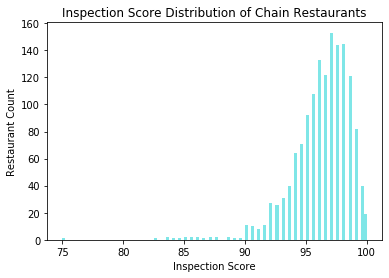

In [33]:
chain_distr = plt.hist(chain_restaurant_inspection['Score'], bins=100, alpha=0.5, color='darkturquoise');
plt.xlabel('Inspection Score');
plt.ylabel('Restaurant Count');
plt.title('Inspection Score Distribution of Chain Restaurants');
mean = int(chain_restaurant_inspection['Score'].mean())


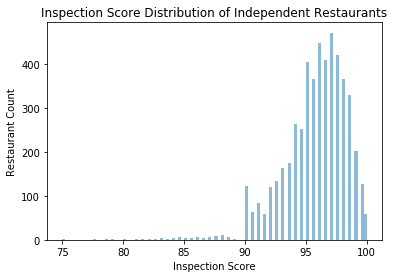

In [35]:
plt.hist(independent_restaurant_inspection['Score'], bins=100, alpha=0.5);
plt.xlabel('Inspection Score');
plt.ylabel('Restaurant Count');
plt.title('Inspection Score Distribution of Independent Restaurants');
mean = int(independent_restaurant_inspection['Score'].mean())


#### Both of the inspection scores of chain and independent restaurants have a left-skewed distribution. These scores are high, with few outliers. 
##### But which received the highest average score?

The next two histograms below show the distribution of average scores received.

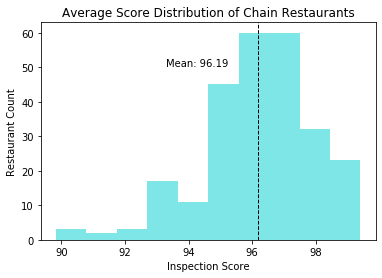

In [39]:
chain_avg_score = plt.hist(df_chain['Average_Score'], alpha=0.5, color='darkturquoise');
plt.xlabel('Inspection Score');
plt.ylabel('Restaurant Count');
plt.title('Average Score Distribution of Chain Restaurants');
x = df_chain['Average_Score'].mean()

# Adding the mean line
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*.97, max_ylim*.8, 'Mean: {:.2f}'.format(x.mean()))

plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)



#### The average inspection score that chain restaurants in Raleigh, NC received was approximately 96.19. 

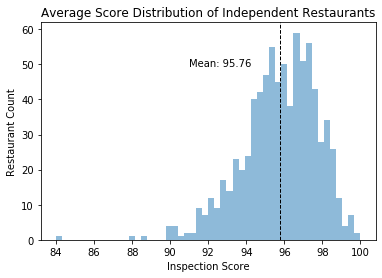

In [40]:
independent_avg_score = plt.hist(df_independent['Average_Score'], bins=50, alpha=0.5);
plt.xlabel('Inspection Score');
plt.ylabel('Restaurant Count');
plt.title('Average Score Distribution of Independent Restaurants');
x = df_independent['Average_Score'].mean()

# Adding the mean line
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*.95, max_ylim*.8, 'Mean: {:.2f}'.format(x.mean()))
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)



#### The average inspection score that independent(non-chain) restaurants received was approximately 95.76.

From these statistics, we can say that on average chain restaurants received higher inspection scores.

### Let's start looking at our critical and non-critical data!

Below are the distributions of critical(red) and non-critical(blue-green). 


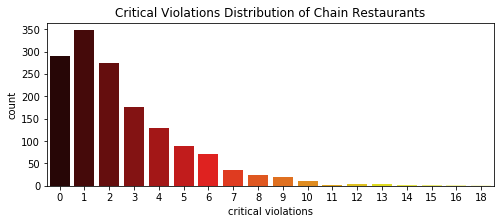

In [41]:
# Critical Chain
plt.figure(figsize=(8, 3))
ax = sns.countplot(palette="hot",x = 'num_critical', data = chain_restaurant_inspection)
ax.set(xlabel = 'critical violations', ylabel = '')
ax.set_xlabel(xlabel = "critical violations", color = 'black')
ax.set_ylabel(ylabel = "count", color = 'black')
plt.title("Critical Violations Distribution of Chain Restaurants")
plt.show()

Above is a right-skewed distribution of critical violations from chain restaurants.

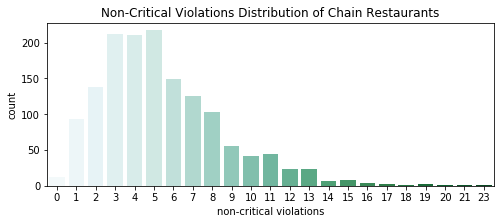

In [42]:
#Non-Critical Chain
plt.figure(figsize=(8, 3))
ax = sns.countplot(palette="BuGn",x = 'num_non_critical', data = chain_restaurant_inspection)
ax.set(xlabel = 'critical violations', ylabel = '')
ax.set_xlabel(xlabel = "non-critical violations", color = 'black')
ax.set_ylabel(ylabel = "count", color = 'black')
plt.title("Non-Critical Violations Distribution of Chain Restaurants")
plt.show()


The next two graphs show the distributions of inspection violations by **independent** restaurants. The graphs above and the following are quite similar; however, we notice that outliers are greater on the graph of chain restaurants. 

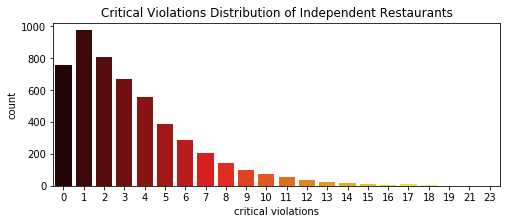

In [43]:
#Critical Independent
plt.figure(figsize=(8, 3))
ax = sns.countplot(palette="hot",x = 'num_critical', data = independent_restaurant_inspection)
ax.set(xlabel = 'critical violations', ylabel = '')
ax.set_xlabel(xlabel = "critical violations", color = 'black')
ax.set_ylabel(ylabel = "count", color = 'black')
plt.title("Critical Violations Distribution of Independent Restaurants")
plt.show()

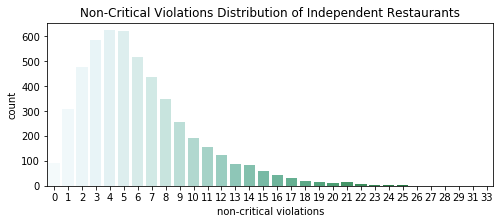

In [45]:
#Non-Critical Independent
plt.figure(figsize=(8, 3))
ax = sns.countplot(palette="BuGn",x = 'num_non_critical', data = independent_restaurant_inspection)
ax.set(xlabel = 'non-critical violations', ylabel = '')
ax.set_xlabel(xlabel = "non-critical violations", color = 'black')
ax.set_ylabel(ylabel = "count", color = 'black')
plt.title("Non-Critical Violations Distribution of Independent Restaurants")
plt.show()

After creating the distributions of critical and non- critical violations for both types of restaurants, not much can be concluded about health inspection scores relative to type of violation and the type of restaurants. 

So far we can say that non-critical violations are more frequently done than critical ones amongst both chain and non-chain restaurants.


### Finding a Correlation

We saw that the mean scores received by **chains** were a tad bit **higher** than independent restaurants.

We also found that non-critical violations were committed more often by both chain and non-chain restaurants.

#### Let's see if we can figure out how the type of violation affects the inspection scores by examining correlations.

We will be using the datasets before they were grouped by restaurant names to increase accuracy.
    1. chain_restaurant_inspection
    2. independent_restaurant_inspection
    
This is because if we were to use information grouped by their restaurants, we would not be able to measure correlation between the number of critical and non-critical violations to the score received. Rather, we would have been measuring sums and averages.



In [46]:
chain_restaurant_inspection

,hsisid,Name,City,Facility_Type,Score,num_critical,num_non_critical
0,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,97.0,3,8
1,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,97.5,5,3
2,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,98.0,0,2
3,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,94.0,4,7
4,4092014493,Chick-Fil-A #1573,Raleigh,Restaurant,97.0,2,6
...,...,...,...,...,...,...,...
1474,4092016663,Bojangles #5,Raleigh,Restaurant,98.0,2,1
1475,4092016663,Bojangles #5,Raleigh,Restaurant,98.0,2,3
1476,4092016663,Bojangles #5,Raleigh,Restaurant,98.5,1,2
1477,4092016663,Bojangles #5,Raleigh,Restaurant,99.0,0,5


#### Using Pearsons Correlation Coefficient to measure the linear relationship between two  numerical variables of data

In our chain_restaurant_inspection and independent_restaurant_inspection datasets, we have individual scores along with the number of critical and number of non-critical violations. 

We will now try to find a correlation between the number of critical and non-critical violations with the scores using a scipy.stats function: **pearonr().**

#### We will be taking a look at the chain restaurants' data first:

In [47]:
# Assigning the data to variables 
x = chain_restaurant_inspection['Score']
y = chain_restaurant_inspection['num_non_critical']
z = chain_restaurant_inspection['num_critical']

In [48]:
#non-critical & avg score, but we're only looking at the correlation
correlation_x_y, p_value = stats.pearsonr(x, y)
correlation_x_y

-0.5602941490350962

In [49]:
#critical & avg score
correlation_x_z, p_value = stats.pearsonr(x, z)
correlation_x_z 

-0.585118187952395

###### We got both negative numbers! This indicates that our (violation) variables have negative correlations to the  scores received.
Let's see what that actually looks like...

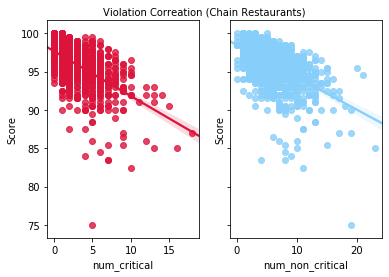

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.title("Violation Correation (Chain Restaurants)", fontsize = 10, ha='right')
sns.regplot(x="num_critical",y="Score", data= chain_restaurant_inspection, color ='crimson', ax = ax1)
sns.regplot(x="num_non_critical",y="Score", data= chain_restaurant_inspection, color ='lightskyblue', ax=ax2)



Now let's take a look at our independent restaurants' dataset..

In [53]:
u = independent_restaurant_inspection['Score']
v = independent_restaurant_inspection['num_non_critical']
w = independent_restaurant_inspection['num_critical']

In [54]:
correlation_u_v, p_value = stats.pearsonr(u, v)
correlation_u_v

-0.5910216707522917

In [55]:
correlation_u_w, p_value = stats.pearsonr(u, w)
correlation_u_w

-0.5937036100864761

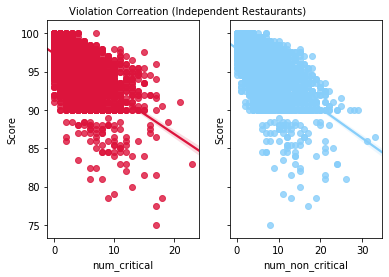

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.title("Violation Correation (Independent Restaurants)", fontsize = 10, ha='right')
sns.regplot(x="num_critical",y="Score", data= independent_restaurant_inspection, color ='crimson', ax = ax1)
sns.regplot(x="num_non_critical",y="Score", data= independent_restaurant_inspection, color ='lightskyblue', ax=ax2)

We see a _strong **negative**_ correlation between the number of critical and non-critical violations with the health inspection scores received. 

What this tells us about the effect from the number of a certain type of violation on a rating is that there's not much of a correlation. 


# Ethics & Privacy 

The question of whether or not chain restaurants receive higher scores from health inspection visits than independent restaurants does not pose clear ethical concerns, for it is regarding information accessible to the public. For example, health inspection ratings are displayed on restaunrat windows, or at least somewhere visible to their customers. 

However, some potential ethical concerns may be regarding the collection of "types of violation", as that is not always known to the general public without looking for it.  The dataset containing the location information could be biased, because Raleigh is the capital of North Carolina. This means it is likely that tourists and other people may visitthis city more than they would another North Carolina city. The way food businesses handle their services may be better than other places in NC, so this analysis would not be ideal when seeking for information about other cities. To preserve privacy, information like, phone numbers have been removed from the analysis.

An unitended (problematic) consequence of this analysis can be that, it could lead consumers to believe that the type of restaurant, chain and independent, play a role in the health inspection scores they receive. This could cause restaurants to lose potential business, in particular, local independent ones.
However, I would protect this by making it known that the conclusion is purely based on our findings in the city of Raleigh, so it is not necessarily accurate everywhere. 

# Conclusion & Discussion

First, we must note that this project was based only **restaurants** in **Raleigh, NC**.


#### After cleaning the health inspection and restaurant datasets and creating visualizations this is what was found:

###### Do chain restaurants in Raleigh, NC receive higher health inspection scores on average than independent restaurants? 

Although both chain and non-chain(independent) restaurants received fairly high inspection scores in Raleigh, NC, with the average of scores for chain being 96.19 and independent 95.76. These numbers were the average of restaurants and their scores, making sure to not calculate multiple inspection visits for this finding. It does not seem like there is a strong correlation between a health inspection rating and the kind of restaurant. 

My hypothesis was that chain restaurants will have higher health inspection scores than independent restaurants for the reasoning that they have higher standards to uphold. Though it was found that chain restaurants had a slightly higher average in health inspection scores than nonchains, the reasoning was not clear. It should also be noted that the average was calculated after averaging the scores of restaurants and their multiple inspection visits. This could have affected the results in that it could've been biased towards chain restaurants, because we also found that there were less individual chain restaurants than independent, but more chain restaurants in total. 



###### How does the number of critical and non-critical violations affect these scores?

This question was asked with intent to explore how and what affectes health inspection scores.I initially thought that there would be a correlation between the number of critical violations and inspection scores, assuming that critical violations would be weighed heavier on a score than noncritical. 

With both chain and nonchain restaurants having committed more non-critical violations than critical, along with having high(left-skewed distributions), we couldn't conclude whether or not there was an actual relation between scores and the violation counts yet. Proceeding with analysis of individual inspection visits of both independent and chain restaurants, we found no correlation. 

Though there was a negative correlation between these variables(for both chain and nonchain restaurants!), a few possible reasons for the lack of correlation could be because the number of violation does not actually have any weight towards the overall score and or, maybe inspectors have a different way of scaling their scores. 


#### Limitations

Limitations to my analysis included being limited to food businesses only in North Carolina, so if the region was not limited, the findings of the analysis could have changed. Besides that, the research questions posed had no significant problem being answered.


#### Takeaways

To society, (hopefully) they will think of a restaurant's health inspection scores with a more open mind, because there are so many factors that could go into it, more than just critical violations...
